---

# Ejemplo de EDA: Análisis Exploratorio de Datos

---

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Conjunto de datos

In [ ]:
ruta = './Data/countries.csv'
df = pd.read_csv(ruta, sep=";")
df.head(10)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,NaN,AL,783754,"sq,el",Albania,"MK,GR,ME,RS,XK",8,355,2986952,NaN,NaN,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,NaN,AM,174982,hy,Armenia,"GE,IR,AZ,TR",51,374,2968000,######,^(\d{6})$,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,NaN,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,NaN,NaN,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,NaN,AY,6697173,NaN,Antarctica,NaN,10,NaN,0,NaN,NaN,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar


In [4]:
# dimensiones
df.shape

(252, 19)

In [5]:
ruta = 'Population_Growth.csv'
df_pop = pd.read_csv(ruta)
df_pop.head(5)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [6]:
# dimensiones
df_pop.shape

(1704, 3)

##  EDA

In [7]:
# generalidades
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (252, 19)
Nombre columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [8]:
# tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

- estadisticos básicos

In [9]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


- Matriz de Correlación

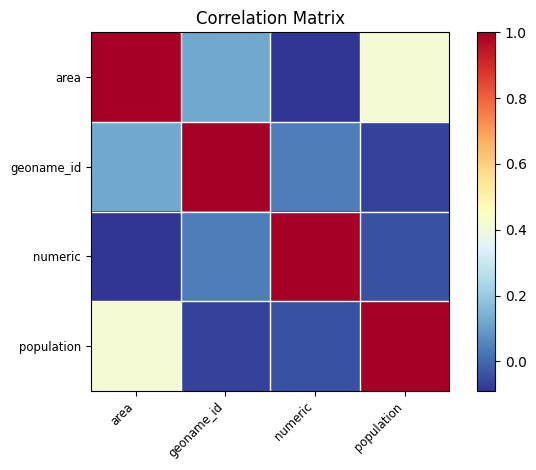

In [10]:
# Filtra el DataFrame para seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

- Filtros en base

In [11]:
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
df_pop_es.head()

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161


In [12]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]
df_pop_ar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


- manipulación de valores

In [13]:
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


## Visual

- barras

<Axes: >

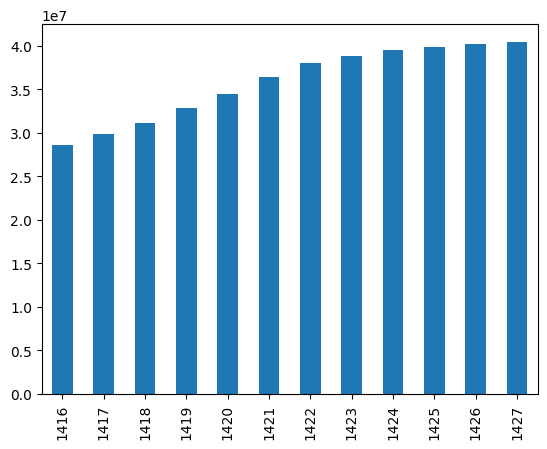

In [14]:
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

<Axes: xlabel='year'>

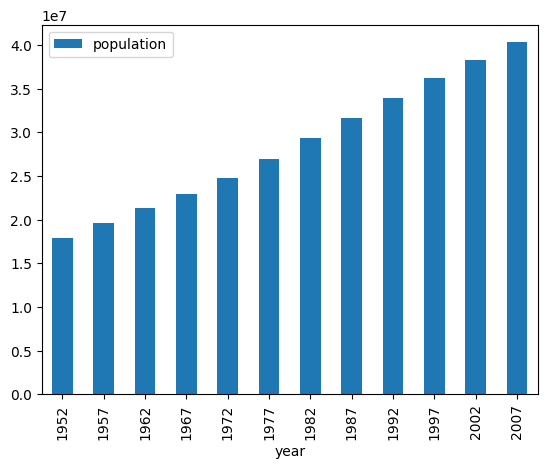

In [15]:
df_pop_ar.set_index('year').plot(kind='bar')

<Axes: >

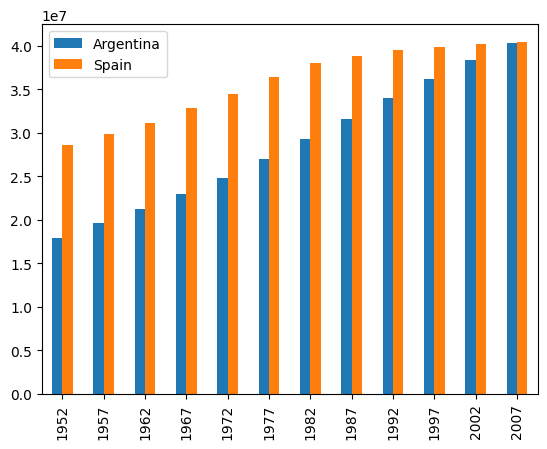

In [16]:
## Comparativa entre 2 países

anios = df_pop_es['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                    'Spain': pop_es}, 
                       index=anios)
df_plot.plot(kind='bar')

<Axes: xlabel='alpha_3'>

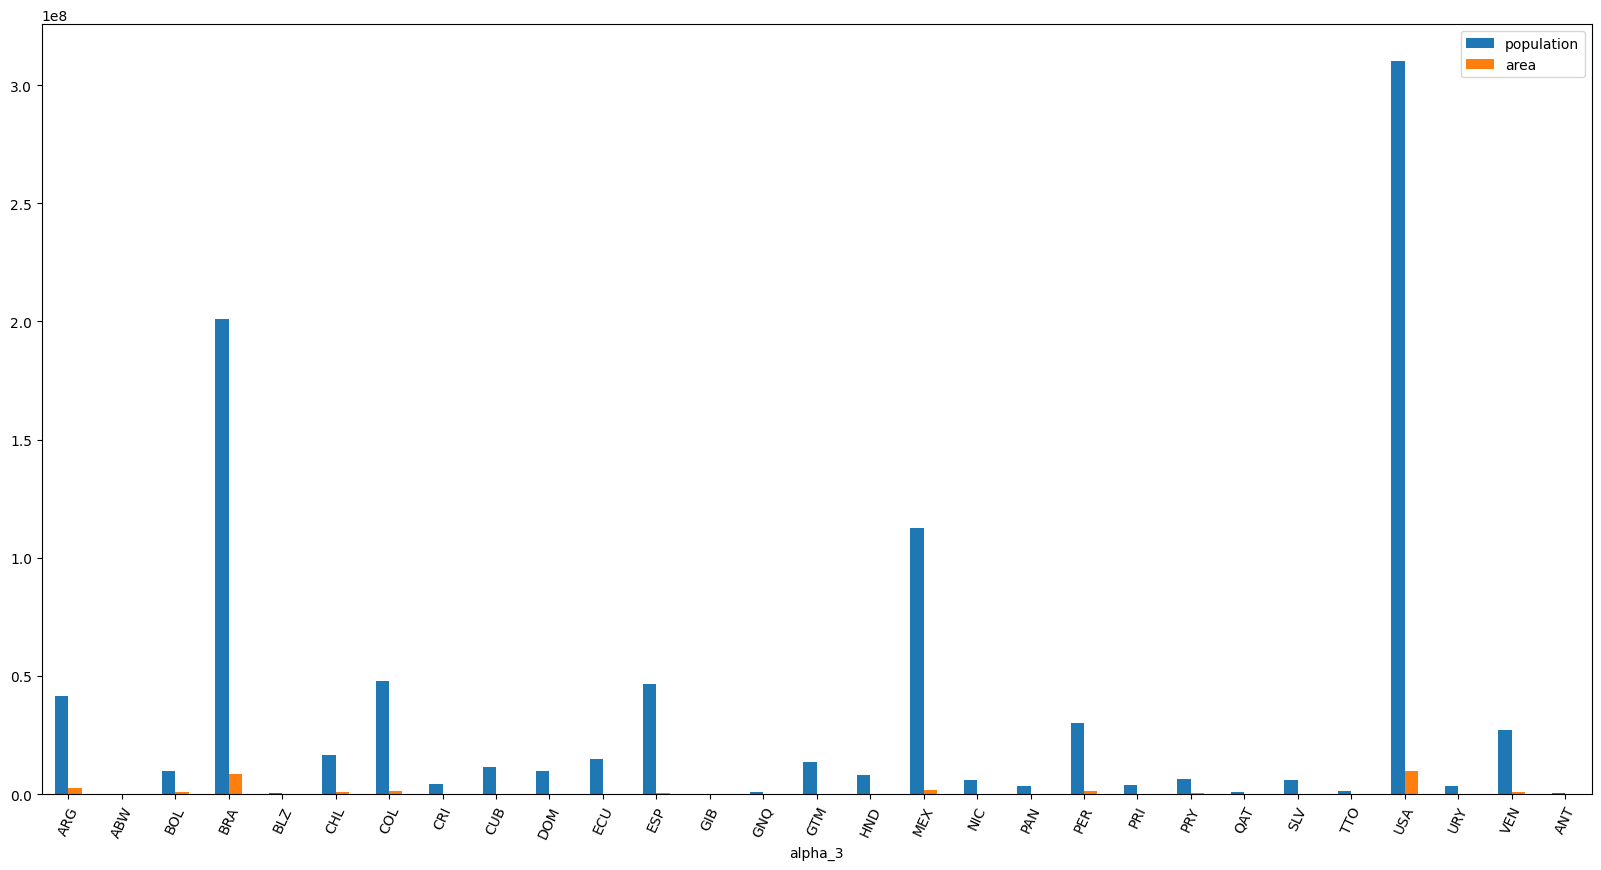

In [17]:
## Visualicemos por población
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Detección de Outliers

In [18]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

In [19]:
# Quitemos BRA y USA por ser outlies y volvamos a graficar:
df_espanol.drop([30,233], inplace=True)

<Axes: xlabel='alpha_3'>

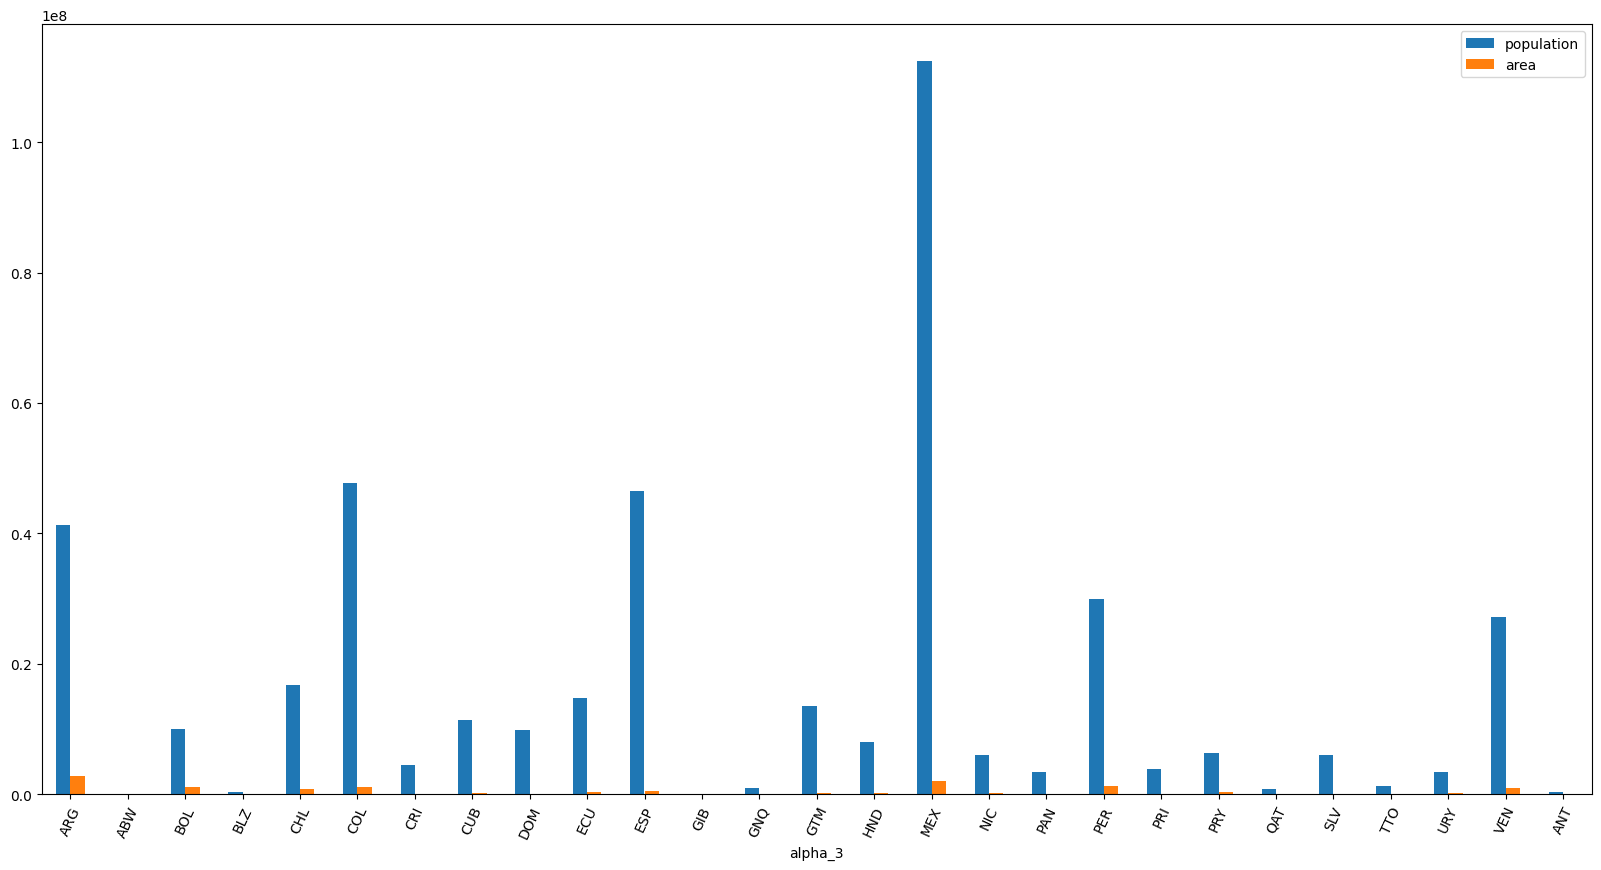

In [20]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Graficamos ordenando por tamaño Población

<Axes: xlabel='alpha_3'>

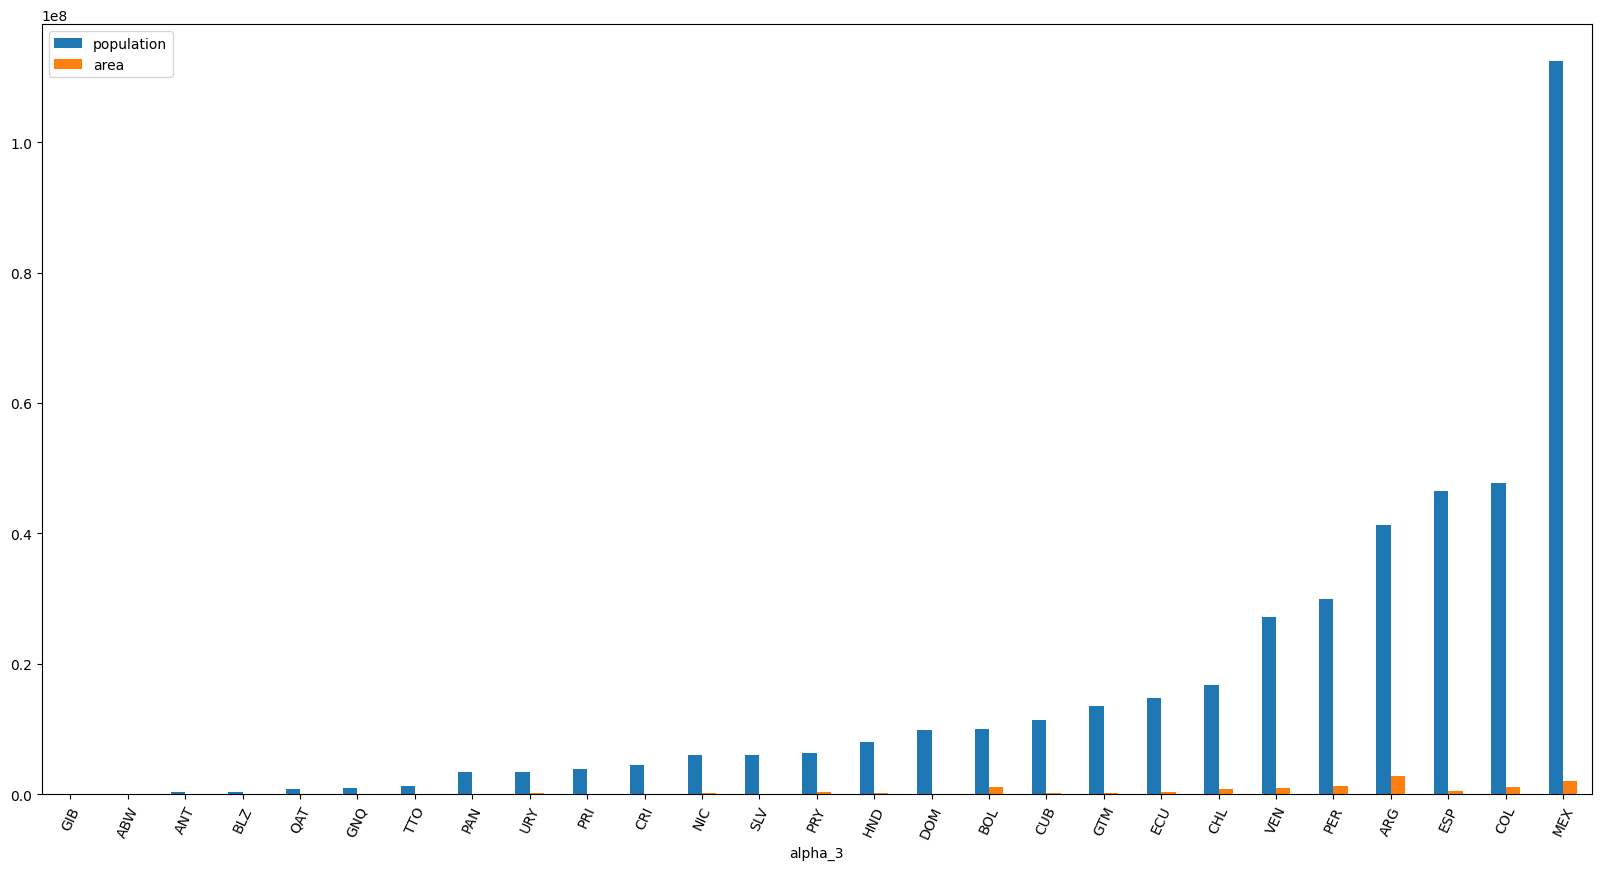

In [21]:
df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))

## Visualización por Área

<Axes: xlabel='alpha_3'>

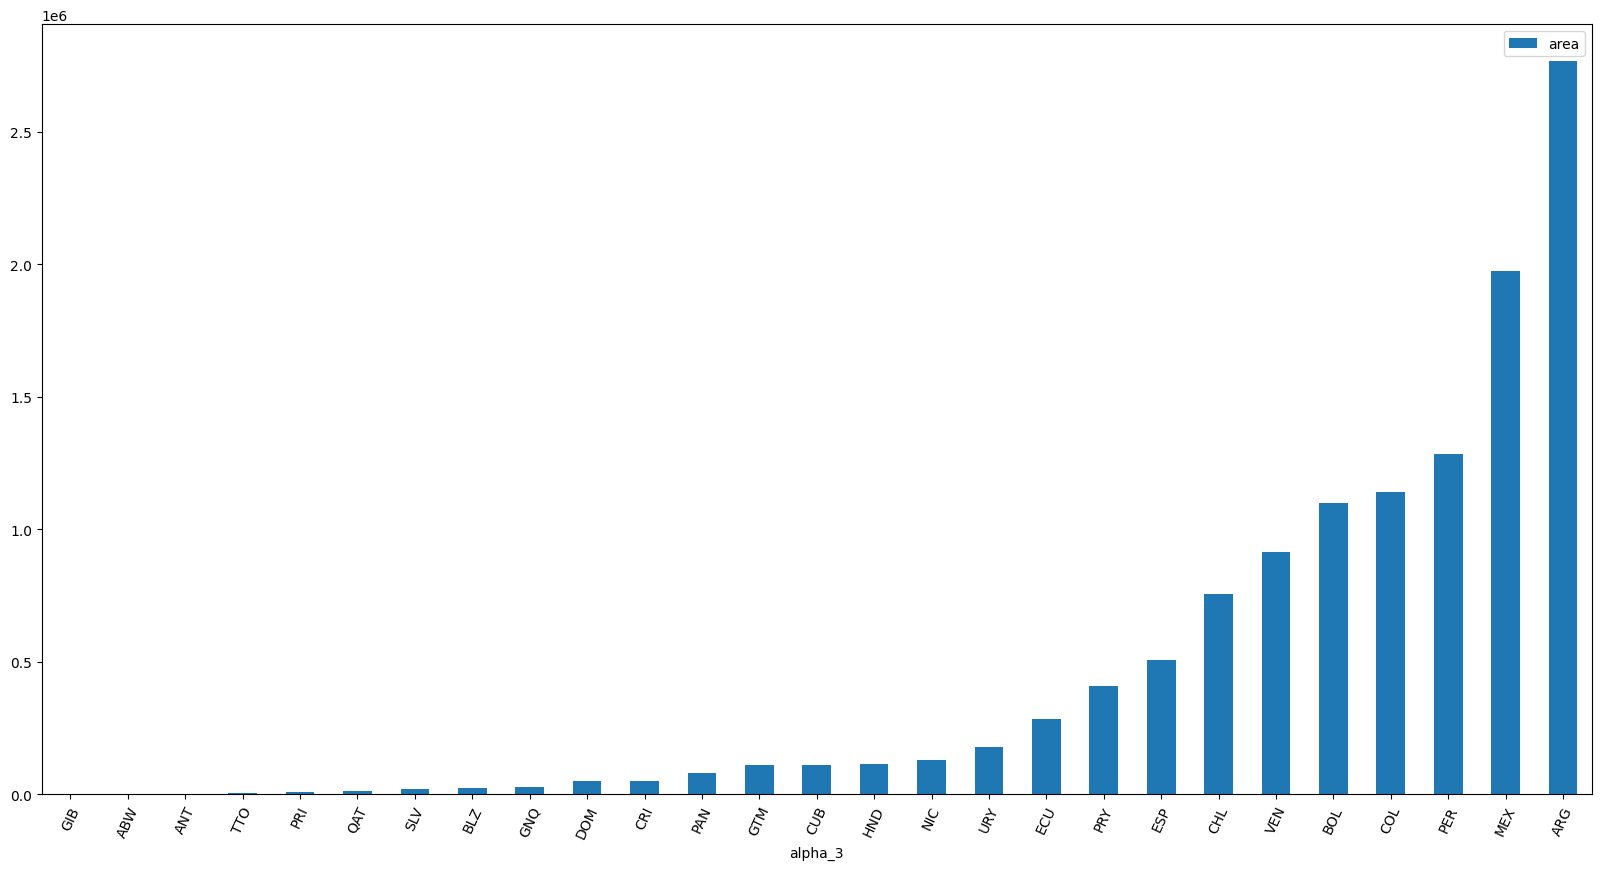

In [22]:
df_espanol.set_index('alpha_3')[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

In [23]:
# En este caso, podriamos quitar por "lo bajo", area menor a 110.000 km2:
df_2 = df_espanol.set_index('alpha_3')
df_2 = df_2[df_2['area'] > 110000]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
COL,CO,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
CUB,CU,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
ECU,EC,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
ESP,ES,504782.0,Madrid,EU,EUR,Euro,,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,#####,^(\d{5})$,.es
HND,HN,112090.0,Tegucigalpa,,HNL,Lempira,,HO,3608932,es-HN,Honduras,"GT,NI,SV",340,504,7989415,@@####,^([A-Z]{2}\d{4})$,.hn
MEX,MX,1972550.0,Mexico City,,MXN,Peso,,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


<Axes: xlabel='alpha_3'>

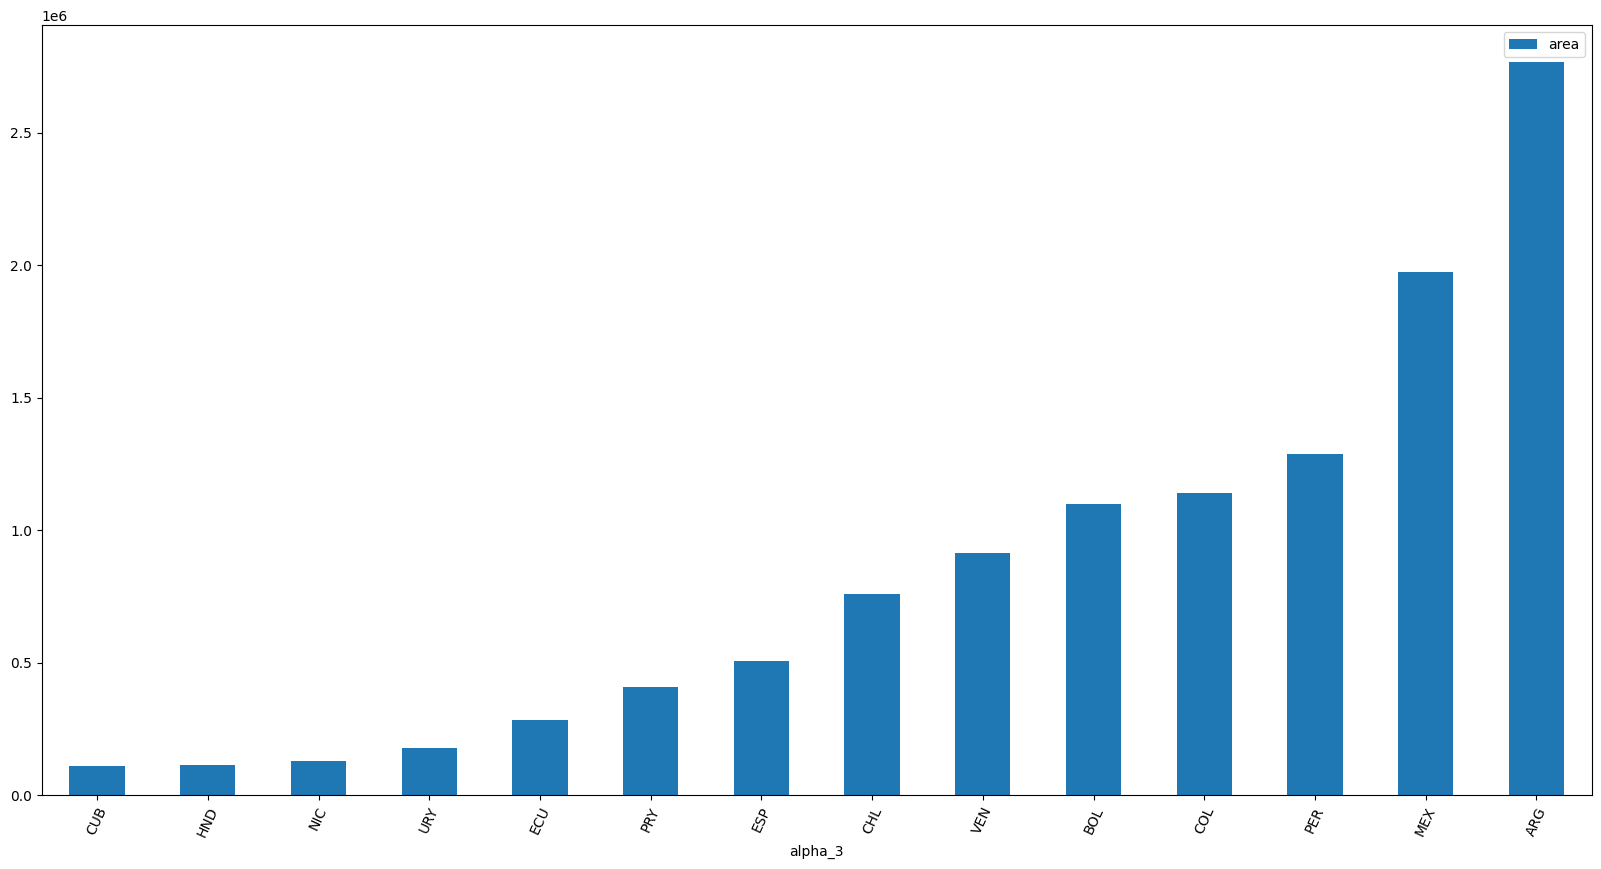

In [24]:
df_2[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

---


# Desarrollar 

In [25]:
valores_nulos_df = df.isna().sum()
print("Valores nulos por columna en 'countries.csv':\n", valores_nulos_df)

Valores nulos por columna en 'countries.csv':
 alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64


In [26]:
# Reemplazar los valores nulos por un valor específico
df['continent'] = df['continent'].fillna('Unknown_Continent')
df['currency_code'] = df['currency_code'].fillna('Unknown_Currency')

In [27]:
valores_nulos_df = df.isna().sum()
print("Valores nulos por columna en 'countries.csv':\n", valores_nulos_df)

Valores nulos por columna en 'countries.csv':
 alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent                0
currency_code            0
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64


In [28]:
valores_nulos_df_pop = df_pop.isna().sum()
print("Valores nulos por columna en 'Population_Growth.csv':\n", valores_nulos_df_pop)

Valores nulos por columna en 'Population_Growth.csv':
 country       0
year          0
population    0
dtype: int64


In [29]:
# Sumamos los valores nulos totales
total_valores_nulos_df = df.isna().sum().sum()
total_valores_nulos_df_pop = df_pop.isna().sum().sum()

print(f"Total de valores nulos en 'countries.csv': {total_valores_nulos_df}")
print(f"Total de valores nulos en 'Population_Growth.csv': {total_valores_nulos_df_pop}")

Total de valores nulos en 'countries.csv': 557
Total de valores nulos en 'Population_Growth.csv': 0


### Mapa de calor de correlación medio enmascarado

In [30]:
# Codificación de continent y currency_code
df['continent_numeric'] = pd.factorize(df['continent'])[0]
df['currency_code_numeric'] = pd.factorize(df['currency_code'])[0]

In [31]:
def half_masked_corr_heatmap(df):
    # Filtra el DataFrame para seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])

    # Calcular la matriz de correlación
    corr = numeric_df.corr()

    # Crear una máscara para ocultar la parte superior del triángulo
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configurar el gráfico y generar el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", square=False, linewidths=0.5, linecolor='gray')

    # Mostrar el gráfico
    plt.title('Mapa de calor de correlación medio enmascarado')
    plt.show()

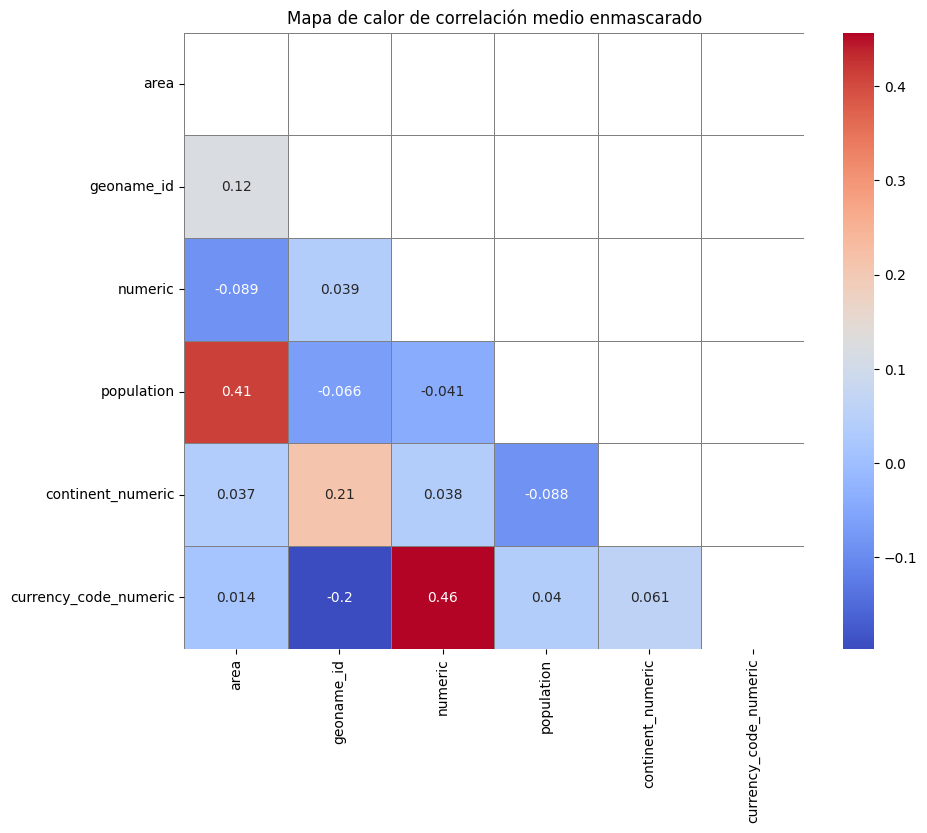

In [32]:
# Llama a la función
half_masked_corr_heatmap(df)

### Correlación a una variable objetivo (espectro de calor)

In [33]:
def corr_to_target(df, target):
    # Filtra el DataFrame para seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])

    # Verificar que la variable objetivo esté en el DataFrame
    if target not in numeric_df.columns:
        print(f"La columna '{target}' no existe en el DataFrame.")
    else:
        # Calcular la correlación con la variable objetivo
        corr_target = numeric_df.corr()[target].sort_values(ascending=False)

        # Crear el gráfico de espectro de calor
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_target.to_frame(), annot=True, cmap="coolwarm", cbar=True)
        plt.title(f'Correlación con la variable {target}')

        # Mostrar el gráfico
        plt.show()

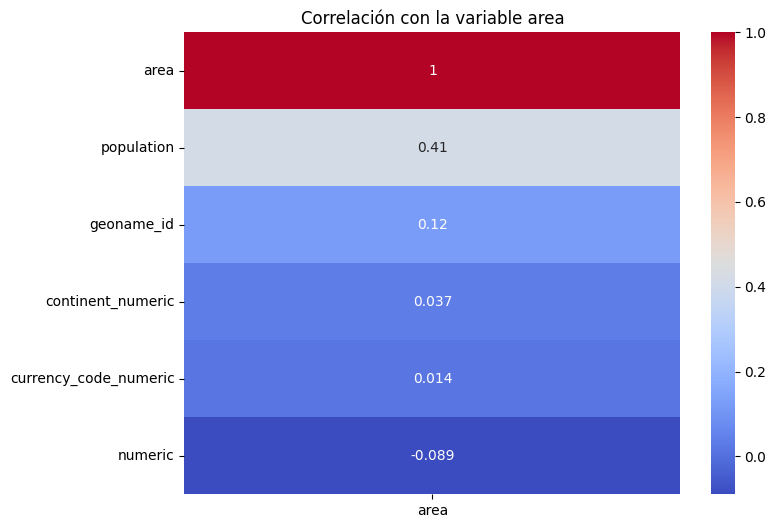

In [34]:
# Llama a la función
corr_to_target(df, 'area')

### Diagramas de dispersión de todas las funciones frente al objetivo


In [35]:
def plot_population_scatter(dataframe):
    # Asegúrate de que 'population' sea numérico
    dataframe['population'] = pd.to_numeric(dataframe['population'], errors='coerce')
    
    plt.figure(figsize=(15, 8))
    
    # Crear un gráfico de dispersión
    scatter = plt.scatter(dataframe['country'], dataframe['population'], color='blue', alpha=0.5)
    
    plt.title('Gráfico de Dispersión: Población por País', fontsize=16)
    plt.xlabel('País', fontsize=14)
    plt.ylabel('Población', fontsize=14)
    plt.xticks(rotation=90)
    
    # Añadir cuadrícula
    plt.grid(True, linestyle='--', alpha=0.5)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

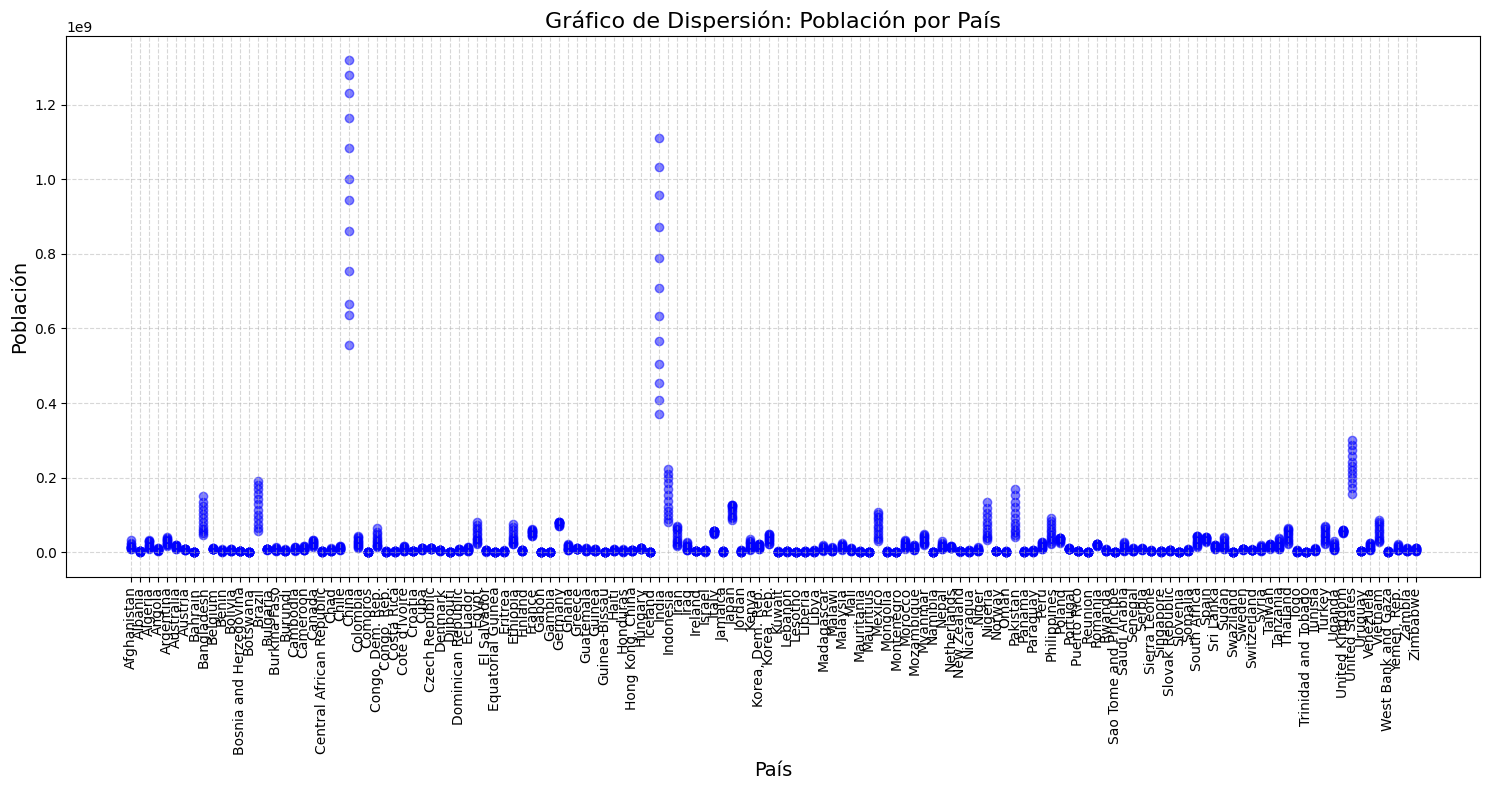

In [36]:
# Llama a la función
plot_population_scatter(df_pop)

### N-a través de histogramas de cada variable

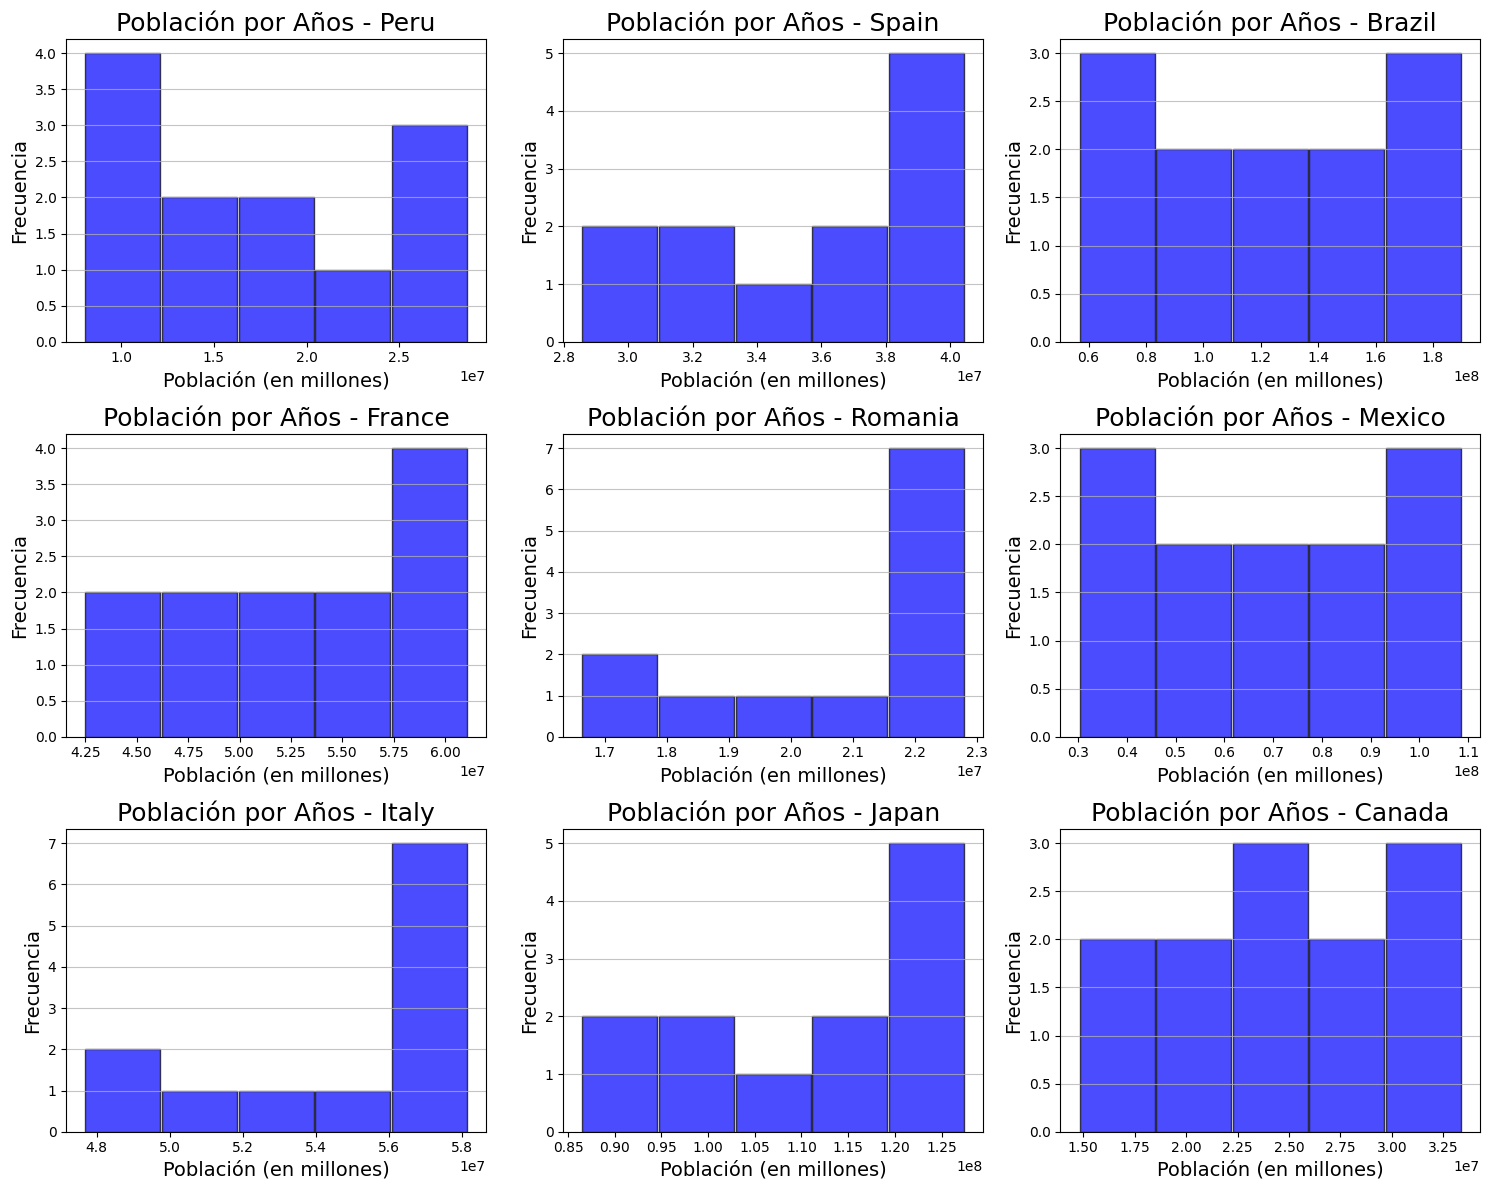

In [37]:
# Lista de países seleccionados
paises_seleccionados = ['Peru', 'Spain', 'Brazil', 'France', 'Romania', 'Mexico', 'Italy', 'Japan', 'Canada']

def gen_population_histograms_by_year(dataframe, countries, column='population', file=None):
    # Filtrar el DataFrame para solo incluir los países seleccionados
    filtered_df = dataframe[dataframe['country'].isin(countries)]
    
    # Crear un número de subgráficas
    num_countries = len(countries)
    cols = 3  # Número de columnas para las subgráficas
    rows = (num_countries + cols - 1) // cols  # Calcular filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.ravel()  # Aplanar la matriz de ejes para facilitar la indexación

    # Crear gráficos de histogramas para cada país
    for i, country in enumerate(countries):
        country_df = filtered_df[filtered_df['country'] == country]
        population_values = country_df[column].dropna()  # Eliminar posibles valores nulos
        
        # Crear el histograma para cada país
        counts, bins, patches = axes[i].hist(population_values, bins=5, color='blue', alpha=0.7, edgecolor='black', rwidth=0.98)
        
        # Añadir títulos y etiquetas
        axes[i].set_title(f'Población por Años - {country}', fontsize=18)
        axes[i].set_xlabel('Población (en millones)', fontsize=14)
        axes[i].set_ylabel('Frecuencia', fontsize=14)
        axes[i].grid(axis='y', alpha=0.75)
        
    # Eliminar ejes vacíos si hay menos gráficos que espacios creados
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if file:
        plt.savefig(file, bbox_inches='tight')
    
    plt.show()

# Generar los histogramas de población
gen_population_histograms_by_year(df_pop, paises_seleccionados, column='population')

### Boxplots

In [38]:
def gen_boxplots(df, cols=1):
    # Filtrar el dataframe para los países seleccionados
    paises_seleccionados = ['Peru', 'Spain', 'Brazil', 'France', 'Romania', 'Mexico', 'Italy', 'Japan', 'Canada']
    df_seleccionados = df_pop[df_pop['country'].isin(paises_seleccionados)]
    
    # Calcular el número de filas y columnas necesarias para los subplots
    rows = math.ceil(len(paises_seleccionados) / cols)
    figwidth = 5 * cols
    figheight = 4 * rows

    # Configurar la figura y los subplots, ajustando su disposición y espaciado.
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()

    # Generar un gráfico de boxplot para cada país seleccionado
    for i, country in enumerate(paises_seleccionados):
        sns.boxplot(data=df_seleccionados[df_seleccionados['country'] == country], 
                    x='country', y='population', ax=ax[i])
        ax[i].set_title(f'Distribución de Población en {country}', fontsize=14)
        ax[i].set_xlabel('País', fontsize=12)
        ax[i].set_ylabel('Población', fontsize=12)
        ax[i].tick_params(labelbottom=False)

    # Ajustar y mostrar el título general del gráfico
    fig.suptitle('Distribución de la Población por País (9 Países)', size=18)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.9)

    # Mostrar el gráfico
    plt.show()

    return

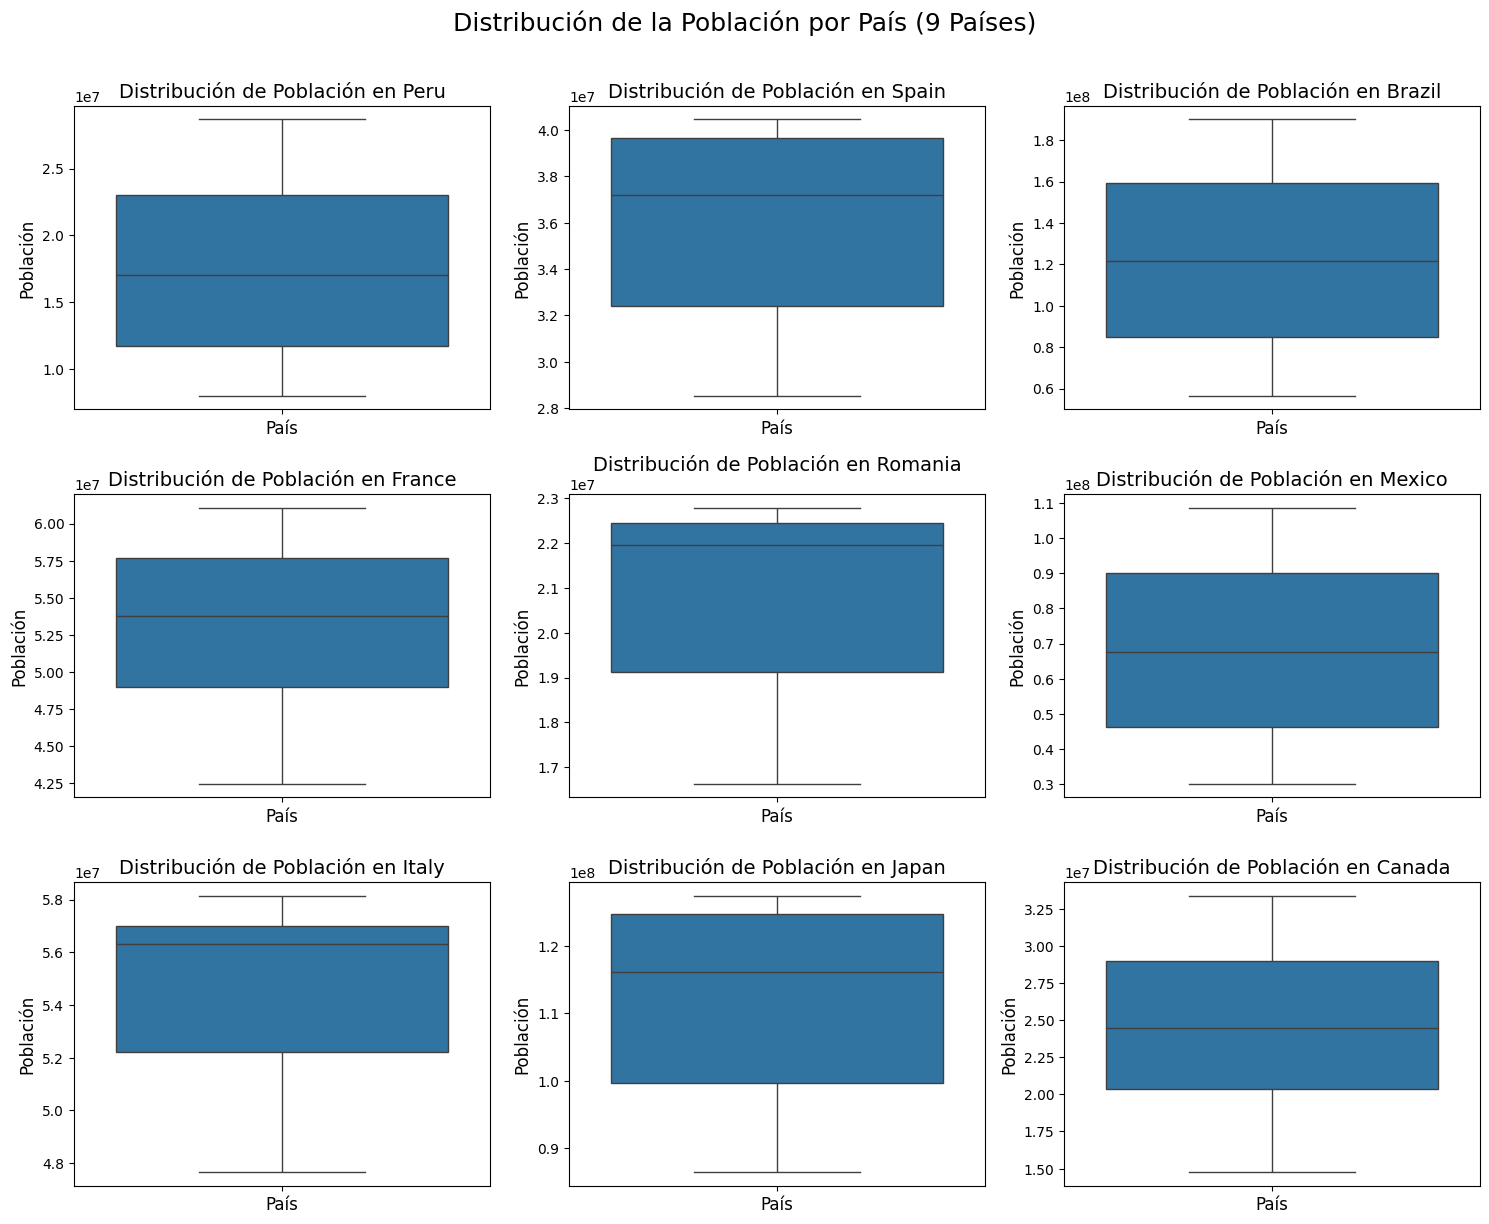

In [39]:
# Llama a la función
gen_boxplots(df, 3)

### N-across Line Charts

In [40]:
def gen_linecharts_phone_population_index(df, cols=2, file=None):
    required_columns = ['phone', 'population', 'capital']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Las columnas faltantes son: {missing_columns}")

    # Filtra el DataFrame para seleccionar solo las columnas necesarias
    numeric_df = df[required_columns].copy()

    # Asegúrate de que los tipos de datos son numéricos para 'phone' y 'population'
    numeric_df['phone'] = pd.to_numeric(numeric_df['phone'], errors='coerce')
    numeric_df['population'] = pd.to_numeric(numeric_df['population'], errors='coerce')

    # Limitar a solo las primeras 60 capitales
    numeric_df = numeric_df.head(60)

    # Obtener la lista de columnas del DataFrame
    list_of_columns = ['phone', 'population']
    rows = math.ceil(len(list_of_columns) / cols)  
    figwidth = 10 * cols  
    figheight = 6 * rows   

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))

    color_choices = ['blue', 'g', 'goldenrod', 'r', 'black', 'darkorange']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax = ax.ravel() if rows * cols > 1 else [ax]

    # Graficar 'phone' y 'population' contra el índice
    for i, column in enumerate(list_of_columns):
        ax[i].plot(numeric_df[column], color=color_choices[i], label=column)
        ax[i].set_title(f'{column.capitalize()} por Índice de Capital', fontsize=18)
        ax[i].set_ylabel(column.capitalize(), fontsize=14)
        ax[i].set_xlabel('Índice', fontsize=14)
        ax[i].set_xticks(range(len(numeric_df)))
        ax[i].set_xticklabels(numeric_df['capital'], rotation=45, ha='right', fontsize=8)
        ax[i].legend()

    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)

    if file:
        plt.savefig(file, bbox_inches='tight')

    plt.show()

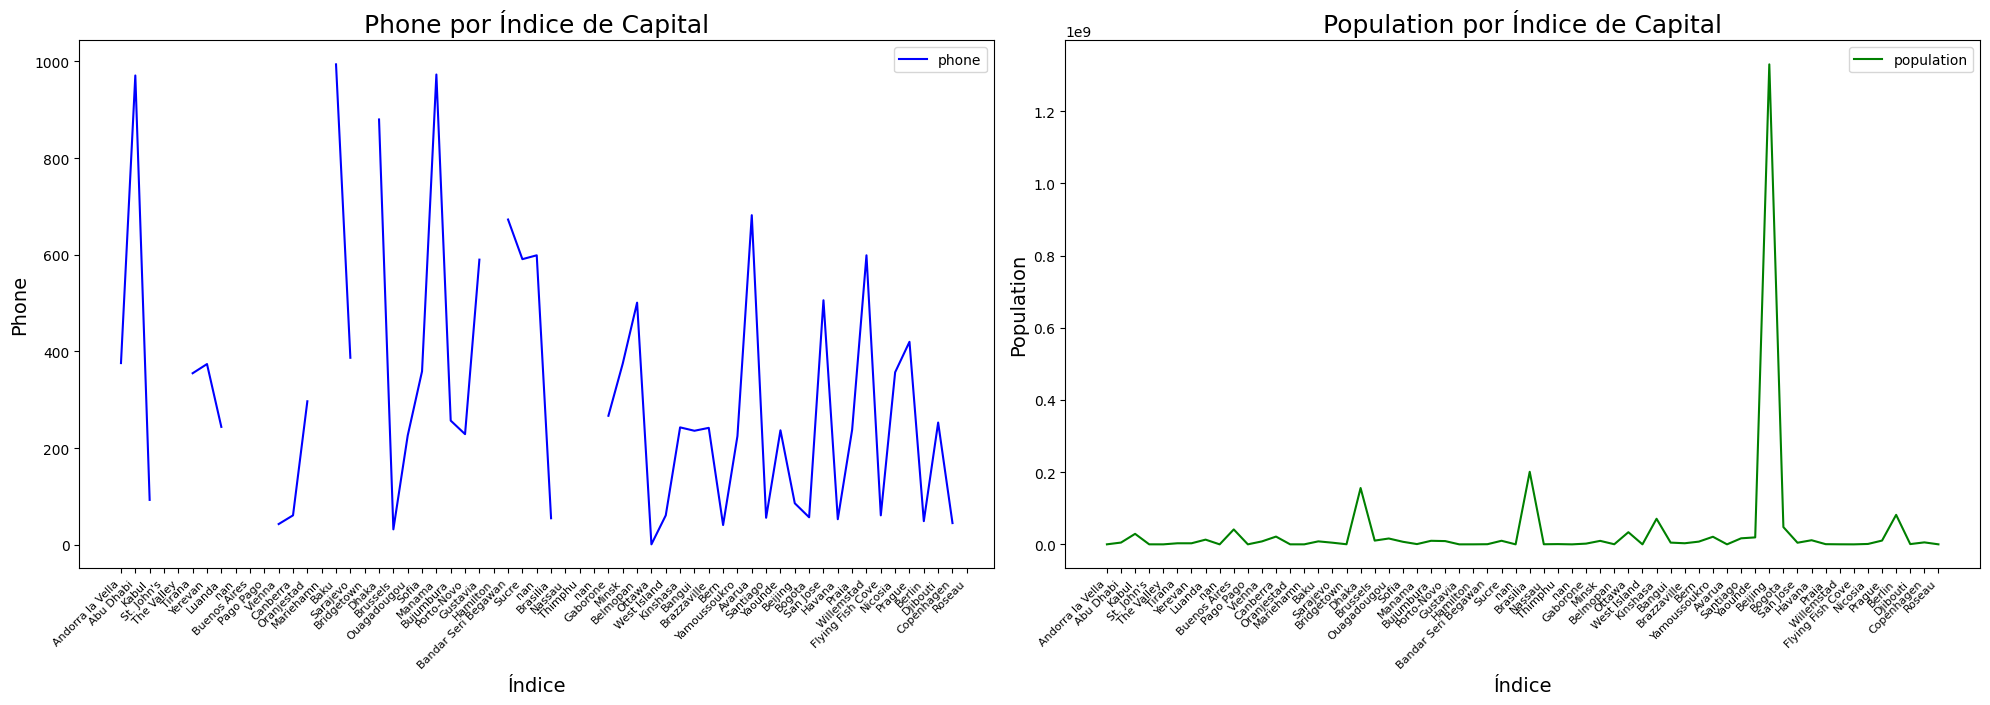

In [41]:
# Llama a la función
gen_linecharts_phone_population_index(df)

### Gráficos de N líneas cruzadas con promedios móviles especificados por el usuario

In [42]:
def gen_linecharts_rolling(df, roll_num=3, cols=3, file=None):
    # Filtra el DataFrame para seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])

    # Obtener la lista de columnas del DataFrame
    list_of_columns = list(numeric_df.columns)
    rows = math.ceil(len(list_of_columns) / cols)  # Calcular el número de filas necesarias
    figwidth = 5 * cols                            # Ajustar el ancho de la figura
    figheight = 4 * rows                           # Ajustar el alto de la figura

    # Aplicar el promedio móvil
    numeric_df = numeric_df.rolling(roll_num).mean()

    # Crear subplots ajustando el número de filas y columnas
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))

    # Definir colores para los gráficos
    color_choices = ['blue', 'g', 'goldenrod', 'r', 'black', 'darkorange']

    # Ajustar los espacios entre los subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # Asegurarse de que ax sea una lista para evitar problemas en caso de tener un solo gráfico
    ax = ax.ravel() if rows * cols > 1 else [ax]

    # Iterar sobre las columnas y generar los gráficos
    for i, column in enumerate(list_of_columns):
        ax[i].plot(numeric_df[column], color=color_choices[i % len(color_choices)])
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)

    # Eliminar los ejes vacíos si hay menos gráficos que espacios creados
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    # Figura
    fig.suptitle('Promedio móvil. Gráficos de líneas', size=18)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)

    # Guardar el gráfico si se especifica un archivo, o mostrar el gráfico
    if file:
        plt.savefig(file, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

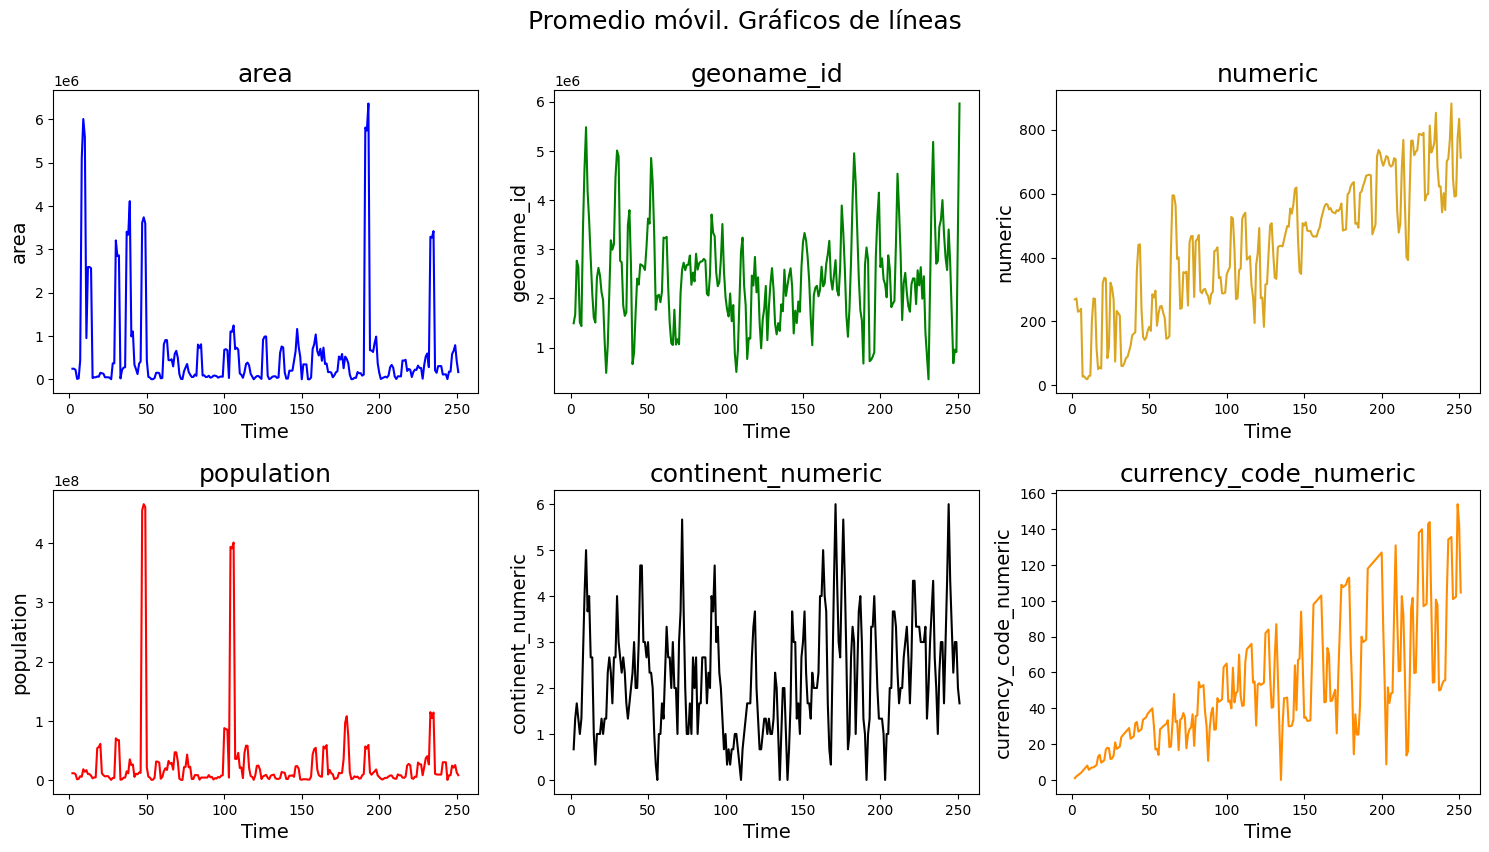

In [43]:
# Llama a la función
gen_linecharts_rolling(df, roll_num=3, cols=3, file=None)

### Pareto

In [64]:
def gen_pareto(df_pop):
    # Obtener la población más reciente por país
    df_pop_latest = df_pop.loc[df_pop.groupby('country')['year'].idxmax()]

    # Ordenar los países por población en orden descendente
    df_pop_sorted = df_pop_latest.sort_values(by='population', ascending=False)

    # Calcular el porcentaje acumulado de la población
    cumulative_percentage = df_pop_sorted['population'].cumsum() / df_pop_sorted['population'].sum() * 100

    # Crear la columna para indicar si está en el 80% acumulado
    df_pop_sorted.loc[:, 'in_80_percent'] = cumulative_percentage <= 80

    # Crear el gráfico de barras para los países más poblados
    plt.figure(figsize=(14, 8))
    sns.barplot(x='country', y='population', 
                hue='in_80_percent', data=df_pop_sorted,
                palette={True: 'red', False: 'green'}, legend=False)

    # Rotar las etiquetas del eje x para mejor visualización
    plt.xticks(rotation=60)

    # Establecer límites en el eje x
    plt.xlim(0, 40)

    # Etiquetas de los ejes
    plt.xlabel('Country')
    plt.ylabel('Population')
    plt.title('Pareto. Countries')

    # Añadir la línea de porcentaje acumulado
    plt.twinx()
    plt.plot(range(len(df_pop_sorted)), cumulative_percentage, color='blue', marker='o', linestyle='-')

    # Mostrar el gráfico
    plt.show()

    # Imprimir el país de corte para el 80% de la población
    cutoff_index = (cumulative_percentage <= 80).sum() - 1
    print("Punto de corte para el 80% de la población:", df_pop_sorted['country'].iloc[cutoff_index])

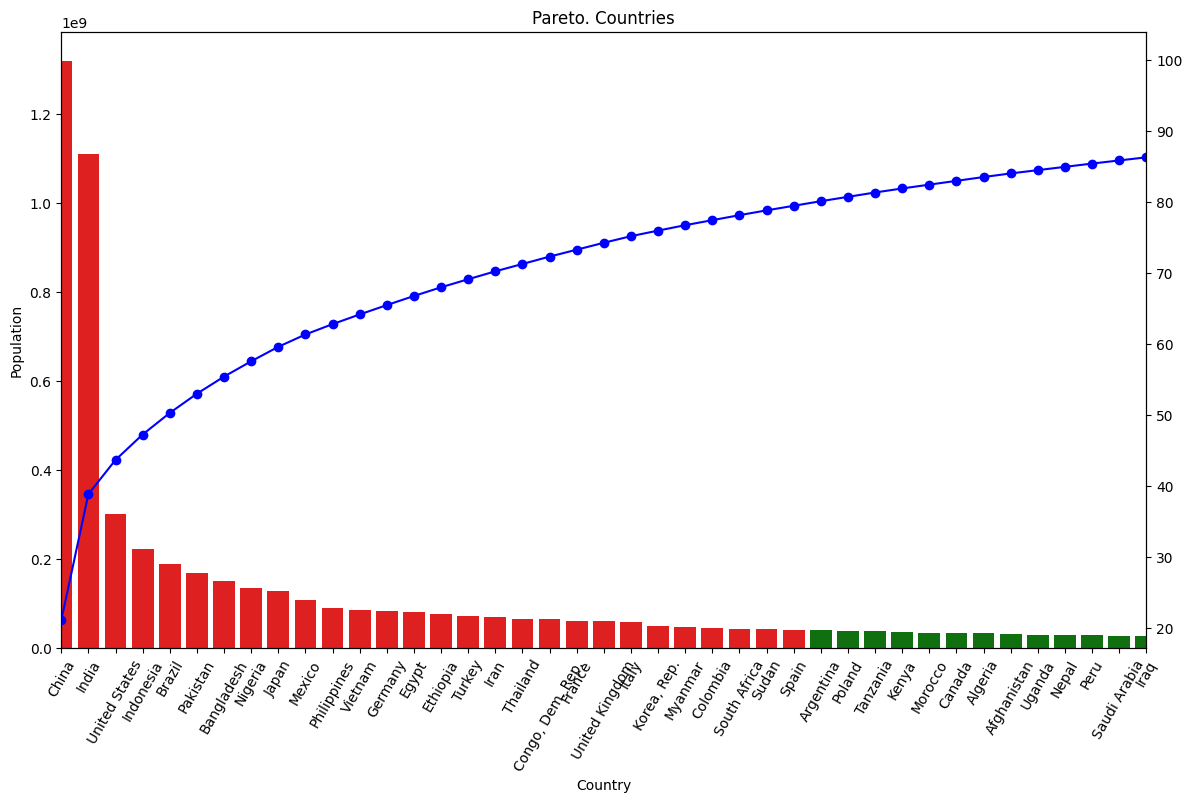

Punto de corte para el 80% de la población: Spain


In [65]:
# Llama a la función
gen_pareto(df_pop)